# Проект 2

## Задание 1. Начните исследование
### Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/real_estate_data.csv

### Шаг 2. Подготовьте данные
определите и заполните пропущенные значения;
приведите данные к нужным типам.
Посчитайте и добавьте в таблицу:
цену квадратного метра
день недели, месяц и год публикации объявления;
этаж, на котором расположена квартира; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

Поясните:
какие пропущенные значения обнаружены;
в чём возможные причины возникновения пропусков;
в каких столбцах потребовалось изменить тип данных и почему;
по какому принципу заполнены пропуски.

Оформление:
Выполните первое задание в Jupyter Notebook. Свои действия описывайте в ячейках типа markdown. Чтобы открыть рабочую тетрадь, нажмите кнопку «Далее».

## Задание 2. Опишите выводы

### Шаг 1. Проведите исследовательский анализ данных и ответьте на вопросы
Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи?
Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.
Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.
Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.
Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.
Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.
Для каждого пункта опишите какие методы вы использовали и какие результаты получили.

### Шаг 2. Напишите общий вывод
Оформление:
Второе задание представьте как текст **в Jupyter Notebook, в ячейке типа markdown. Примените форматирование и заголовки.

### Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении


## Оглавление: <a class="anchor" id="28"></a>
* [Часть 1. Предварительный анализ данных](#first)
* [Подготовка данные](#second)
    * [Серия домов](#3)
    * [Количество фотографий](#4)
    * [Цена на момент снятия с публикации](#5)
    * [Площадь квартиры](#6)
    * [Дата публикации](#7)
    * [Количество комнат](#9)
     * [Создание новых столбцов](#8)
    * [Высота потолков](#10)
    * [Количество этажей](#11)
    * [Жилая площадь](#12)
    * [Этаж](#13)
    * [Апартаменты, студии, свободная планировка](#14)
    * [Площадь кухни](#15)
    * [Наличие балкона](#16)
    * [Название населенного пункта](#17)
    * [Расстояние до аэропорта, расстояние до центра,расстояние до парка, расстояние до водоема ](#18)
    * [Парки в радиусе 3 км, водоем в радиусе 3 км](#19)
* [Итог 1 части](#20)
* [Часть 2. Исследовательский анализ данных](#21)
    * [Типичная квартира и ее параметры](#22)
     * [Подытог 1](#23)
    * [Факторы, влияющие на стоимость](#24)
    * [Цена квадратного метра](#25)
    * [Сегменты типичных квартир](#26)
    * [Характерные параметры для апартаментов, студий и свободной планировки](#27)
* [Итог проекта](#28)
    

## Шаг 1. Откроем файл с данными и изучим общую информацию <a class="anchor" id="first"></a>


### Импортируем необходимые нам библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pymystem3 import Mystem
import pprint
from collections import Counter

### Откроем и прочтем файл, разделим знаком табуляции столбцы для приведения таблицы в читабельный вид, выведем  первые 15 строк датафрейма

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


In [3]:
data.head(15)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,Сталинский,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,NaN,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,NaN,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,NaN,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,NaN,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,NaN,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим на наши данные более детально. Используем дополнительные параметры перцентилей, чтобы получить более наглядные данные

In [4]:
data.describe(percentiles = [.025, .05, .25, .50, .75, .95, .975])

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,60.348651,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,35.654083,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,12.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
2.5%,0.000000,1.449945e+06,29.000000,1.000000,2.500000,3.000000,14.400000,1.000000,29.000000,5.200000,0.000000,10458.600000,2357.000000,0.000000,51.000000,0.000000,62.000000,6.000000
5%,1.000000,1.870000e+06,31.000000,1.000000,2.500000,4.000000,15.200000,1.000000,31.000000,5.500000,0.000000,11557.400000,3541.000000,0.000000,95.900000,0.000000,93.000000,9.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,40.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,52.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,69.900000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
95%,20.000000,1.530000e+07,116.000000,4.000000,3.300000,25.000000,69.000000,16.000000,116.000000,20.000000,2.000000,51340.000000,31671.600000,2.000000,968.000000,3.000000,976.550000,647.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

In [6]:
data.shape

(23699, 24)

In [7]:
#Посмотрим  наличие дубликатов
data.duplicated().sum()

0

Дубликатов нет, это отлично))

In [8]:
#Посмотрим количество пропусков и отсортируем данные по пропускам для наглядности
data.isnull().sum().sort_values(ascending = False)


is_apartment            20924
building_series_id      17182
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
area                        0
open_plan                   0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
total_images                0
studio                      0
dtype: int64

## Предварительный анализ 
Посмотрев на данные, мы видим, что у нас много NaN почти во всех столбцах,особенно в серии домов и апартментах. Нужно будет разобраться с ними и проанализировать целесообразность и тип замены. Много значений с плавающей точкой, где это не нужно (количество этажей, количество балконов,наличие парков рядом, количество дней объявления и т.п.) Этот тип данных надо будет заменить на целочисленный. Мы видим много нулевых значений (в балконах, комнатах, фотографиях), по которым тоже надо понять возможно ли такое значение или это ошибки в данных

## Шаг 2. Подготовим данные <a class="anchor" id="second"></a>
Определим и заполним пропущенные значения, приведем данные к нужным типам.


Посмотрим на столбцы в отдельности, чтобы проанализировать данные более детально

### Серия домов <a class="anchor" id="3"></a>

In [9]:
data['building_series_id'].value_counts()

1564812.0            2807
1564812               998
1564792.0             374
1564801.0             311
1564806.0             175
1568627.0             144
1569071.0             133
1564792               133
1564796.0             116
1564801                92
1569033.0              87
1564806                67
1569038.0              62
Кирпичный              60
1568627                52
Кирп.Монолит           47
1569066.0              46
1564796                44
1569071                40
1568734.0              37
1569033                32
1568675.0              28
1568643.0              26
1569054.0              24
1569038                23
1569088.0              23
Старый фонд            22
Старый фонд с КР       22
137 серия              21
137                    19
                     ... 
15                      2
121 (Гатчинская)        2
старый фонд             2
100                     2
1568709.0               2
корабль                 1
Индивид.                1
ИТП         

Мы видим, что серии домов очень разномастные и сочетают в себе и числа, и названия, и вспомогательные символы. Необходимо привести все названия к нижнему регистру, перевести в тип object. Также, мы обнаружили большое количество пропущенных значений в этих данных. Для удобства и наглядности, заменю их на значение "Серия неизвестна".  Я вижу много похожих названий в сериях домов, думаю есть смысл лемматирзировать их. 

In [10]:
#Заменим пропуски на Серия неизвестна
data['building_series_id'] = data['building_series_id'].fillna("Серия неизвестна")

In [11]:
data['building_series_id'] = data[['building_series_id']].astype(str)

In [12]:
#Приводим к нижнему регистру
data['building_series_id'] = data['building_series_id'].str.lower()

In [13]:
data['building_series_id'].sample(10)

610      серия неизвестна
23599    серия неизвестна
10033    серия неизвестна
19489    серия неизвестна
11822    серия неизвестна
19930    серия неизвестна
14880           1564812.0
20646    серия неизвестна
9523     серия неизвестна
10471           1564812.0
Name: building_series_id, dtype: object

Мы преобразовали building_series_id в тип object

Теперь попробуем лемматизировать

In [14]:
unique_building_series = data.building_series_id.unique()
print(unique_building_series)

['1564812' 'серия неизвестна' 'сталинский' '1568627.0' '1564812.0'
 '1568643.0' '1564806.0' '1564796.0' '1569038.0' '1564801.0' '1564801'
 '1569071.0' '1564792' 'панельный' '1569071' '1564792.0' '1569054.0'
 '1569033.0' '504' '1569066' '600.11 серия' '1568690.0' '1564806'
 '712041.0' 'брежневка' '1568627' '1568663.0' 'старый фонд с кр'
 '1568734.0' '137 серия' '712041' '1569066.0' 'хрущевка' '600' '1569033'
 '1568675.0' 'кирпичный монолит' '1564796' 'индивидуальный' 'старый фонд'
 'кирп.монолит' 'кирпичный' '1568663' '1568658' '1569075.0' '1568658.0'
 '7' '1569038' '1569054' '1569061.0' '121 (гатчинская)' '1568675'
 '602 серия' '1 лг - 600.11' '137' '606 серия' '1569088.0' '1569048.0'
 '100' '1568643' '1569041.0' '121' '1569079.0' '1569041' 'блочный'
 'старый фонд + капремонт' 'монолит' '1лг-502' '121(гатчинская)' 'ii-18/9'
 '13' '1568653' '1-528 кп - 2' '1569088' '504 серия' 'монол.панельный'
 'корабль' '1568653.0' '121 гатчинская' '1568700' '1568690' '1лг-6066м'
 '1-335-1' '1568700.0

In [15]:
m = Mystem()
string = ' ; '.join(unique_building_series)
pprint.pprint(string)
lemmas = m.lemmatize(string)



('1564812 ; серия неизвестна ; сталинский ; 1568627.0 ; 1564812.0 ; 1568643.0 '
 '; 1564806.0 ; 1564796.0 ; 1569038.0 ; 1564801.0 ; 1564801 ; 1569071.0 ; '
 '1564792 ; панельный ; 1569071 ; 1564792.0 ; 1569054.0 ; 1569033.0 ; 504 ; '
 '1569066 ; 600.11 серия ; 1568690.0 ; 1564806 ; 712041.0 ; брежневка ; '
 '1568627 ; 1568663.0 ; старый фонд с кр ; 1568734.0 ; 137 серия ; 712041 ; '
 '1569066.0 ; хрущевка ; 600 ; 1569033 ; 1568675.0 ; кирпичный монолит ; '
 '1564796 ; индивидуальный ; старый фонд ; кирп.монолит ; кирпичный ; 1568663 '
 '; 1568658 ; 1569075.0 ; 1568658.0 ; 7 ; 1569038 ; 1569054 ; 1569061.0 ; 121 '
 '(гатчинская) ; 1568675 ; 602 серия ; 1 лг - 600.11 ; 137 ; 606 серия ; '
 '1569088.0 ; 1569048.0 ; 100 ; 1568643 ; 1569041.0 ; 121 ; 1569079.0 ; '
 '1569041 ; блочный ; старый фонд + капремонт ; монолит ; 1лг-502 ; '
 '121(гатчинская) ; ii-18/9 ; 13 ; 1568653 ; 1-528 кп - 2 ; 1569088 ; 504 '
 'серия ; монол.панельный ; корабль ; 1568653.0 ; 121 гатчинская ; 1568700 ; '
 '156

In [16]:
pprint.pprint(Counter(lemmas))

Counter({' ; ': 106,
         ' ': 20,
         '-': 15,
         'серия': 6,
         '1': 6,
         'старый': 4,
         'фонд': 4,
         '121': 4,
         '600.11': 3,
         'монолит': 3,
         'гатчинский': 3,
         'панельный': 2,
         '504': 2,
         'кр': 2,
         '137': 2,
         '600': 2,
         'кирпичный': 2,
         'индивидуальный': 2,
         '.': 2,
         ') ; ': 2,
         'лг': 2,
         ' - ': 2,
         '606': 2,
         '1лг': 2,
         '528': 2,
         'кп': 2,
         'г': 2,
         '1564812': 1,
         'неизвестный': 1,
         'сталинский': 1,
         '1568627.0': 1,
         '1564812.0': 1,
         '1568643.0': 1,
         '1564806.0': 1,
         '1564796.0': 1,
         '1569038.0': 1,
         '1564801.0': 1,
         '1564801': 1,
         '1569071.0': 1,
         '1564792': 1,
         '1569071': 1,
         '1564792.0': 1,
         '1569054.0': 1,
         '1569033.0': 1,
         '1569066': 1,
         

In [17]:
data['building_series_id'] = data.building_series_id.apply(lambda x: 
            'индивидуальный проект' if 'индивид.' in m.lemmatize(str(x)) or 'индивидуальный' in m.lemmatize(str(x))
            else 'кирпичный' if 'кирпа' in m.lemmatize(str(x)) or 'кирпичный' in m.lemmatize(str(x))
            else 'кирпичный монолит'  if 'кирп.монолит' in m.lemmatize(str(x))                                            
            else 'гатчинская' if 'гатчинский' in m.lemmatize(str(x))
            else 'старый фонд с ремонтом' if 'капремонт' in m.lemmatize(str(x)) or ('кр' in m.lemmatize(str(x))
                                                                               and 'без' not in m.lemmatize(str(x)))                                                    
            else 'старый фонд без ремонта' if 'старый' in m.lemmatize(str(x))
            else 'монолитный' if 'монолит' in m.lemmatize(str(x))                                                                        
            else x
                                                          )

In [18]:
data['building_series_id'].value_counts()

серия неизвестна           17182
1564812.0                   2807
1564812                      998
1564792.0                    374
1564801.0                    311
1564806.0                    175
1568627.0                    144
1564792                      133
1569071.0                    133
кирпичный                    121
1564796.0                    116
1564801                       92
1569033.0                     87
1564806                       67
1569038.0                     62
1568627                       52
1569066.0                     46
1564796                       44
1569071                       40
1568734.0                     37
1569033                       32
старый фонд без ремонта       31
1568675.0                     28
старый фонд с ремонтом        26
1568643.0                     26
1569054.0                     24
1569088.0                     23
1569038                       23
137 серия                     21
137                           19
          

Нам удалось укрупнить наши данные и снизить количество категорий. Хотя я до конца не уверена, что это стоило делать с учетом того, что в данных больше 70% пропусков и мои преобразования особо картину не поменяли. Или я не права и это надо было делать?

### Количество фотографий <a class="anchor" id="4"></a>

In [19]:
data['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64

Из этих данных видно, что самое популярное количество фотографий - 10 штук.  Сами данные выглядят вполне корректно, трогать их не буду, тем более, что они не влияют на дальнейший анализ

### Цена на момент снятия публикации <a class="anchor" id="5"></a>

In [20]:
data['last_price'].value_counts()

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
3600000.0     257
3300000.0     244
3800000.0     240
3200000.0     238
3700000.0     234
4100000.0     233
5500000.0     227
3400000.0     227
3900000.0     221
3100000.0     220
4600000.0     216
5200000.0     206
5000000.0     199
4800000.0     198
5100000.0     194
5300000.0     192
4900000.0     190
4700000.0     190
3000000.0     182
6500000.0     178
4400000.0     177
3650000.0     165
2900000.0     162
3950000.0     157
6000000.0     151
             ... 
6940637.0       1
9420000.0       1
12303979.0      1
740000.0        1
30900000.0      1
6460000.0       1
999999.0        1
26037742.0      1
5875000.0       1
16499000.0      1
7201000.0       1
63900000.0      1
2815000.0       1
2765000.0       1
3160000.0       1
10921556.0      1
3994000.0       1
4318000.0       1
9684619.0       1
12306168.0      1
19370000.0      1
2945600.0       1
2975000.0       1
965780.0        1
3785000.0 

Сами данные у меня пока не вызывают вопросов, поэтому просто использую их для расчета квадратного метра жилья. Для этого разделим стоимость на общее количество метров

In [21]:
data['m2'] = data['last_price']/data['total_area']


In [22]:
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2
0,1564812,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,серия неизвестна,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,сталинский,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,серия неизвестна,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,серия неизвестна,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Столбец добавлен! Приведем его к целочисленному значению, т.к. это не повлияет на анализ, но сделает данные более удобными

In [23]:
data['m2'] = data[['m2']].astype(int)

In [24]:
data['m2'].head()

0    120370
1     82920
2     92785
3    408176
4    100000
Name: m2, dtype: int64

### Площадь квартиры <a class="anchor" id="6"></a>

In [25]:
data['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
40.00     315
43.00     301
32.00     289
46.00     282
36.00     280
50.00     279
35.00     262
38.00     237
41.00     227
55.00     227
33.00     224
52.00     218
34.00     218
54.00     217
58.00     217
37.00     213
39.00     210
30.00     206
57.00     201
62.00     193
48.00     190
47.00     188
70.00     183
80.00     175
56.00     173
         ... 
40.21       1
35.96       1
68.88       1
35.58       1
170.90      1
25.07       1
160.70      1
21.10       1
130.21      1
33.02       1
105.34      1
41.53       1
35.47       1
78.24       1
52.68       1
35.27       1
26.50       1
288.00      1
248.00      1
30.35       1
162.40      1
72.85       1
61.79       1
42.11       1
52.39       1
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

In [26]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Мы видим, что минимальная площадь квартир 12 метров, а максимальная 900, что гипотетически вполне реально. Пропусков нет. Поэтому трогать эти данные пока не буду

### Дата публикации <a class="anchor" id="7"></a>

In [27]:
data['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
2018-07-10T00:00:00     93
2017-09-28T00:00:00     74
2018-03-06T00:00:00     72
2018-02-08T00:00:00     71
2018-02-20T00:00:00     70
2018-01-12T00:00:00     70
2018-03-23T00:00:00     67
2017-09-26T00:00:00     65
2017-04-14T00:00:00     63
2017-11-29T00:00:00     59
2018-03-15T00:00:00     58
2018-02-13T00:00:00     58
2018-09-11T00:00:00     58
2017-11-16T00:00:00     55
2017-08-09T00:00:00     55
2017-11-09T00:00:00     54
2017-10-03T00:00:00     54
2017-04-20T00:00:00     54
2019-04-04T00:00:00     54
2018-01-01T00:00:00     53
2019-03-26T00:00:00     53
2017-12-07T00:00:00     53
2018-02-22T00:00:00     52
2017-11-22T00:00:00     52
2017-10-26T00:00:00     52
                      ... 
2015-10-06T00:00:00      1
2015-06-13T00:00:00      1
2015-08-02T00:00:00      1
2016-07-21T00:00:00      1
2014-12-23T00:00:00      1
2016-01-04T00:00:00      1
2

Время и дата в неудобном формате, надо переформатировать и привести к типу  datetime

In [28]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = "%Y-%m-%dT%H:%M:%S")

In [29]:
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2
0,1564812,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,серия неизвестна,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,сталинский,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,серия неизвестна,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,серия неизвестна,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
building_series_id      23699 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_a

 Мы привели формат времени в удобный читабельный вид и видим, что тип данных изменился на  datetime. 
 
 ### Теперь нам надо добавить в таблицу день недели, месяц и год публикации объявления <a class="anchor" id="8"></a>
 
 Использую для этого нотацию .dt

In [31]:
data['week_day_exposition'] = data['first_day_exposition'].dt.dayofweek
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [32]:
#проверяем получилось ли создать столбцы
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,week_day_exposition,month_exposition,year_exposition
0,1564812,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
1,серия неизвестна,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,сталинский,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
3,серия неизвестна,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
4,серия неизвестна,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018


Столбцы созданы, но неудобно обозначение числами дней и месяцев. Можно попробовать заменить их на названия дней недели и месяцев.

In [33]:
data['month_exposition'] = data['month_exposition'].map({
    1:'январь', 2:'февраль', 3:'март', 4:'апрель', 5:'май', 6:'июнь', 7:'июль', 8:'август', 
    9:'сентябрь', 10:'октябрь', 11:'ноябрь', 12:'декабрь'
})

data['week_day_exposition'] = data['week_day_exposition'].map({0:'понедельник', 1:'вторник', 
                            2:'среда', 3:'четверг', 4:'пятница', 5:'суббота', 6:'воскресенье'})



In [34]:
# столбец год сделаем целочисленным
data['year_exposition'] = data['year_exposition'].astype('int16')

In [35]:
#Проверяем как всё получилось
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,week_day_exposition,month_exposition,year_exposition
0,1564812,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,четверг,март,2019
1,серия неизвестна,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,вторник,декабрь,2018
2,сталинский,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,четверг,август,2015
3,серия неизвестна,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,пятница,июль,2015
4,серия неизвестна,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,вторник,июнь,2018


### Апартменты, студии, свободная планировка <a class="anchor" id="14"></a>

In [36]:
print(data['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


Значения корректные, имеют булевый тип. Однако очень много пропусков в данных и квартир с параметром  True совсем мало - 50 штук

In [37]:
print(data['studio'].value_counts())

False    23550
True       149
Name: studio, dtype: int64


Значения корректные, имеют булевый тип. Количество True  всего 149

In [38]:
print(data['open_plan'].value_counts())

False    23632
True        67
Name: open_plan, dtype: int64


Значения корректные, имеют булевый тип. Можно посмотреть на данные по студиям и апартментам и попробовать объединить в один столбец "планировка квартиры"

In [39]:
def type_plan(row):
    if row['is_apartment'] == True:
        return "апартаменты"
    elif row['studio'] == True:
        return "студия"
    elif row['open_plan'] == True:
        return "свободная планировка"
    else:
        return "другое"

In [40]:
data['type_plan'] = data.apply(type_plan, axis=1)

In [41]:
data['type_plan'].value_counts()

другое                  23433
студия                    149
свободная планировка       67
апартаменты                50
Name: type_plan, dtype: int64

In [43]:
#Проверяем добавился ли столбец
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,week_day_exposition,month_exposition,year_exposition,type_plan
0,1564812,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,1.0,482.0,2.0,755.0,NaN,120370,четверг,март,2019,другое
1,серия неизвестна,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,...,0.0,NaN,0.0,NaN,81.0,82920,вторник,декабрь,2018,другое
2,сталинский,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,...,1.0,90.0,2.0,574.0,558.0,92785,четверг,август,2015,другое
3,серия неизвестна,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,...,2.0,84.0,3.0,234.0,424.0,408176,пятница,июль,2015,другое
4,серия неизвестна,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,2.0,112.0,1.0,48.0,121.0,100000,вторник,июнь,2018,другое


### Количество комнат <a class="anchor" id="9"></a>

In [44]:
print(data['rooms'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


Мы видим, что самое большое количество квартир с 1, 2 и 3 комнатами.Это не вызывает вопросов, т.к. действительно большинство домов строятся именно с таким количеством комнат. Вопросы вызывают квартиры с 0 комнат - это скорее всего ошибка, а также с необычайно большим количеством комнат (больше 8)

In [45]:
rooms_counts = data[data['rooms'] > 8].shape[0]
print("rooms: {}\tПроцент супер многокомнатных квартир: {:.1%}"
      .format(rooms_counts, rooms_counts/data.shape[0]))

rooms: 19	Процент супер многокомнатных квартир: 0.1%


Процент таких квартир не очень большой, на анализ они не влияют, я считаю, что можно их оставить. Вопрос вызывают квартиры с нулевым значением комнат. Является ли этот параметр ошибкой либо это обозначение использовали для квартир-студий, где по сути комнат нет. Можно проверить это, категоризируя наши квартиры

In [46]:
rooms_counts = data[data['rooms'] <= 0].shape[0]
print("rooms: {}\tПроцент нулевых квартир: {:.1%}"
      .format(rooms_counts, rooms_counts/data.shape[0]))

rooms: 197	Процент нулевых квартир: 0.8%


Таких квартир не много, но посмотрим, может они связаны с планировкой?

In [47]:
data[data['rooms'] == 0]['type_plan'].value_counts()

студия                  138
свободная планировка     59
Name: type_plan, dtype: int64

Догадка подтвердилась! Все квартиры с нулевым количеством комнат либо студии, либо свободной планировки. Т.к. при любом типе планировки все-таки одна комната как минимум всегда есть, заменим 0 на 1

In [48]:
data['rooms'] = data['rooms'].where(data['rooms'] != 0, 1)

In [49]:
data['rooms'].value_counts()

1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

Отлично! Замена прошла успешно!

###  Высота потолков <a class="anchor" id="10"></a>

In [50]:
print(data['ceiling_height'].value_counts())

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
2.55       980
2.75       910
2.65       676
3.20       277
3.10       203
2.90       164
3.30       141
2.56       139
3.50       130
2.57       103
2.85       101
3.40        92
2.54        83
2.64        81
2.52        79
2.53        67
2.58        63
2.77        61
2.76        60
3.15        57
2.78        51
2.95        47
3.05        46
4.00        39
3.25        36
          ... 
2.89         1
1.75         1
2.25         1
5.50         1
3.68         1
26.00        1
3.88         1
3.42         1
3.29         1
2.34         1
8.30         1
4.14         1
4.30         1
4.37         1
5.60         1
3.98         1
4.65         1
14.00        1
4.90         1
3.82         1
2.49         1
4.06         1
1.20         1
4.15         1
3.39         1
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64


 Эти данные содержат много информации, которая выглядит неправдоподобно. Потолки высотой выше 3,8 метров и ниже 2.3 метра скорее всего ошибочны.  Посмотрим сколько таких квартир и если не очень много, то их можно будет убрать. Также избавимся от пропусков, заменив на медиану, сгруппировав по серии домов

In [51]:
data['ceiling_height'].isnull().sum()

9195

In [52]:
#Посмотрим какой процент неправдоподобно низких и высоких потолков
ceiling_height_counts = data[data['ceiling_height'] < 2.3].shape[0]
print("ceiling_height: {}\tПроцент низких потолков: {:.1%}"
      .format(ceiling_height_counts, ceiling_height_counts/data.shape[0]))

ceiling_height: 16	Процент низких потолков: 0.1%


In [53]:
ceiling_height_counts = data[data['ceiling_height'] > 3.8].shape[0]
print("ceiling_height: {}\tПроцент высоких потолков: {:.1%}"
      .format(ceiling_height_counts, ceiling_height_counts/data.shape[0]))

ceiling_height: 147	Процент высоких потолков: 0.6%


Процент в обеих категориях весьма невысокий, поэтому можем убрать эти данные

In [54]:
print(data.shape)
data = data.drop(data[data['ceiling_height'] < 2.3].index, axis=0)
print(data.shape)

(23699, 29)
(23683, 29)


In [55]:
print(data.shape)
data = data.drop(data[data['ceiling_height'] > 3.8].index, axis=0)
print(data.shape)

(23683, 29)
(23536, 29)


In [56]:
ceiling_height_median = data['ceiling_height'].median()
print("Медиана высоты потолка: {:.2f}".format(ceiling_height_median))

Медиана высоты потолка: 2.65


In [57]:
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)


In [58]:
data['ceiling_height'].isnull().sum()

0

Замена прошла успешно

### Количество этажей <a class="anchor" id="11"></a>

In [59]:
data['floors_total'].value_counts()

5.0     5730
9.0     3754
16.0    1373
12.0    1360
10.0    1173
4.0     1172
25.0    1074
6.0      892
17.0     830
3.0      655
7.0      584
14.0     551
18.0     504
24.0     468
8.0      388
2.0      376
15.0     364
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     123
1.0       25
35.0      24
28.0      21
36.0       2
29.0       1
60.0       1
33.0       1
52.0       1
34.0       1
Name: floors_total, dtype: int64

In [60]:
data['floors_total'].describe()

count    23450.000000
mean        10.702644
std          6.596494
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

В наших данных минимальное и максимальное количество этажей выглядит вполне реальным, а вот с пропусками надо будет поработать)

In [61]:
data['floors_total'].isnull().sum()

86

Заменим пропущенные значения на median и проверим успешность замены

In [62]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [63]:
data['floors_total'].isnull().sum()

0

### Жилая площадь <a class="anchor" id="12"></a>

In [64]:
data['living_area'].value_counts()

18.00     879
17.00     672
30.00     593
16.00     486
20.00     479
28.00     423
31.00     380
19.00     328
32.00     318
29.00     317
15.00     312
27.00     311
43.00     230
40.00     224
42.00     217
33.00     212
35.00     192
39.00     187
34.00     187
36.00     169
17.50     169
44.00     169
38.00     157
45.00     146
37.00     139
21.00     137
47.00     136
48.00     131
41.00     131
50.00     127
         ... 
17.71       1
16.76       1
71.20       1
91.24       1
17.78       1
116.20      1
119.30      1
16.16       1
18.04       1
34.14       1
26.21       1
18.03       1
13.09       1
77.80       1
16.69       1
75.70       1
75.80       1
81.90       1
99.90       1
14.01       1
139.40      1
15.41       1
17.93       1
47.43       1
85.20       1
5.00        1
152.00      1
16.31       1
332.00      1
15.55       1
Name: living_area, Length: 1761, dtype: int64

In [65]:
data['living_area'].describe()

count    21643.000000
mean        34.192438
std         21.177136
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Данные по жилой площади вызывают вопрос. Минимально значение в 2 метра выглядит неправдоподобно. Нижний квартиль в 5% (в первом дискрайб в самом начале) показывает площадь в 15 метров. Возмем за пороговое значение например 10 метров

In [66]:
living_area_counts = data[data['living_area'] < 10].shape[0]
print("living_area: {}\tПроцент квартир малой площади: {:.1%}"
      .format(living_area_counts, living_area_counts/data.shape[0]))

living_area: 25	Процент квартир малой площади: 0.1%


Процент очень небольшой, можно избавиться

In [67]:
print(data.shape)
data = data.drop(data[data['living_area'] < 10].index, axis=0)
print(data.shape)

(23536, 29)
(23511, 29)


In [68]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [69]:
data['living_area'].isnull().sum()

0

 Посчитаем отношение жилой площади к общей

In [70]:
data['living_area_relation'] = data['living_area']/data['total_area']
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,week_day_exposition,month_exposition,year_exposition,type_plan,living_area_relation
0,1564812,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,482.0,2.0,755.0,NaN,120370,четверг,март,2019,другое,0.472222
1,серия неизвестна,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,...,NaN,0.0,NaN,81.0,82920,вторник,декабрь,2018,другое,0.460396
2,сталинский,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,...,90.0,2.0,574.0,558.0,92785,четверг,август,2015,другое,0.612500
3,серия неизвестна,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,...,84.0,3.0,234.0,424.0,408176,пятница,июль,2015,другое,0.188679
4,серия неизвестна,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,112.0,1.0,48.0,121.0,100000,вторник,июнь,2018,другое,0.320000


### Этаж <a class="anchor" id="13"></a>

In [71]:
print(data['floor'].value_counts())

2     3329
3     3034
1     2898
4     2778
5     2599
6     1297
7     1209
8     1080
9     1047
10     687
12     524
11     519
13     378
15     340
14     335
16     314
17     225
18     178
19     146
21     124
22     112
20     110
23     100
24      63
25      46
26      23
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64


Нам нужно категоризировать этаж на котором расположена квартира. Для этого сделаем функцию, которая будет определять первый, последний или неизвестный этаж

In [72]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [73]:
data['floor_category'] = data.apply(floor_category, axis=1)

In [74]:
data[['floor', 'floor_category']].sample(20)

,floor,floor_category
12213,3,другой
18916,1,первый
21791,5,последний
22045,1,первый
18802,5,последний
17166,6,другой
19372,1,первый
3829,13,другой
15091,5,последний
11299,7,другой


### Площадь кухни <a class="anchor" id="15"></a>

In [75]:
data['kitchen_area'].value_counts()

6.00      1296
10.00     1250
8.00      1102
9.00      1092
7.00      1060
11.00      790
12.00      656
8.50       415
5.50       398
14.00      381
5.00       358
15.00      344
13.00      320
6.30       295
6.20       282
8.30       271
6.50       262
8.20       235
7.50       232
8.40       213
9.50       181
16.00      176
10.30      172
7.20       167
10.80      162
10.20      160
7.10       158
10.50      154
8.10       152
8.70       150
          ... 
13.93        1
54.20        1
10.55        1
9.82         1
42.70        1
3.30         1
51.80        1
21.53        1
8.77         1
10.12        1
24.80        1
13.02        1
28.20        1
13.39        1
12.38        1
23.71        1
11.27        1
7.15         1
9.09         1
18.07        1
37.90        1
8.96         1
9.51         1
5.14         1
18.93        1
11.43        1
112.00       1
8.38         1
29.50        1
17.61        1
Name: kitchen_area, Length: 964, dtype: int64

In [76]:
data['kitchen_area'].isnull().sum()

2257

Много пропусков. Заменю их на медианное значение, сгруппировав по серии домов

In [77]:
data['kitchen_area']= data.groupby('building_series_id')['kitchen_area'].transform(lambda x: x.fillna(x.median()))

In [78]:
#Проверяем, что замена прошла успешно
data['kitchen_area'].isnull().sum()

0

Минимальная площадь равна 1 метру, что мало похоже на правду, как и кухня площадью в 112 метров. В 5% квантиль попадают кухни с площадью в 5 метров. Посмотри какой процент у нас кухонь площадью менее 4 метров и более 50

In [79]:
kitchen_area_count = data[data['kitchen_area'] < 4].shape[0]
print("kitchen_area: {}\tПроцент таких кухонь: {:.1%}"
      .format(kitchen_area_count, kitchen_area_count/data.shape[0]))

kitchen_area: 29	Процент таких кухонь: 0.1%


In [80]:
kitchen_area_count = data[data['kitchen_area'] > 50].shape[0]
print("kitchen_area: {}\tПроцент таких кухонь: {:.1%}"
      .format(kitchen_area_count, kitchen_area_count/data.shape[0]))

kitchen_area: 41	Процент таких кухонь: 0.2%


Таких кухонь и правда очень мало. Можем избавиться от них

In [81]:
print(data.shape)
data = data.drop(data[data['kitchen_area'] < 4].index, axis=0)
print(data.shape)

(23511, 31)
(23482, 31)


In [82]:
print(data.shape)
data = data.drop(data[data['kitchen_area'] > 50].index, axis=0)
print(data.shape)

(23482, 31)
(23441, 31)


Теперь нам надо посчитать и добавить столбей в таблицу: отношение площади кухни к общей площади

In [83]:
data['kitchen_total_area_relation'] = data['kitchen_area']/data['total_area']

In [84]:
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,m2,week_day_exposition,month_exposition,year_exposition,type_plan,living_area_relation,floor_category,kitchen_total_area_relation
0,1564812,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,755.0,NaN,120370,четверг,март,2019,другое,0.472222,другой,0.231481
1,серия неизвестна,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,...,NaN,81.0,82920,вторник,декабрь,2018,другое,0.460396,первый,0.272277
2,сталинский,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,...,574.0,558.0,92785,четверг,август,2015,другое,0.612500,другой,0.148214
3,серия неизвестна,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,...,234.0,424.0,408176,пятница,июль,2015,другое,0.188679,другой,0.058491
4,серия неизвестна,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,48.0,121.0,100000,вторник,июнь,2018,другое,0.320000,другой,0.410000


In [85]:
data.isnull().sum().sort_values(ascending = False)


is_apartment                   20708
parks_nearest                  15497
ponds_nearest                  14472
balcony                        11374
airports_nearest                5501
cityCenters_nearest             5481
parks_around3000                5480
ponds_around3000                5480
days_exposition                 3134
locality_name                     48
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                     0
last_price                         0
studio                             0
total_images                       0
floors_total                       0
living_area                        0
floor                              0
kitchen_total_area_relation        0
area                               0
open_plan                          0
kitchen_area                       0
floor_category                     0
m2                                 0
week_day_exposition                0
m

Надо решить вопрос с типом данных

In [86]:
# Приведем к целочисленному типу часть данных, в которых данные с плавающей точкой избыточны
data['total_area'] = data['total_area'].astype('int64')
data['last_price'] = data['last_price'].astype('int64')
data['total_images'] = data['total_images'].astype('int8')
data['rooms'] = data['rooms'].astype('int8')
data['floor'] = data['floor'].astype('int8')


### Наличие балкона <a class="anchor" id="16"></a>

In [87]:
data['balcony'].value_counts()

1.0    4153
0.0    3722
2.0    3631
5.0     301
4.0     179
3.0      81
Name: balcony, dtype: int64

In [88]:
data['balcony'].isnull().sum()

11374

Мы видим, что фактически половина значений пропущена. Надо попробовать понять на что заменять эти пропуски и заменять ли вообще. 

Пока я не нашла взаимосвязей пропусков и других параметров, таких как серия домов или тип планировки например. Поэтому пока оставлю эти данные в том виде, в котором они есть.

In [89]:
data.pivot_table(index = 'type_plan', columns='balcony', values='floor', aggfunc='count')


balcony,0.0,1.0,2.0,3.0,4.0,5.0
type_plan,,,,,,
апартаменты,NaN,9.0,13.0,NaN,1.0,3.0
другое,3704.0,4111.0,3527.0,81.0,178.0,298.0
свободная планировка,7.0,15.0,31.0,NaN,NaN,NaN
студия,11.0,18.0,60.0,NaN,NaN,NaN


In [90]:
data.pivot_table(index='building_series_id', columns='balcony', values='floor', aggfunc='count')


balcony,0.0,1.0,2.0,3.0,4.0,5.0
building_series_id,,,,,,
1 лг - 600.11,NaN,NaN,1.0,NaN,NaN,NaN
1-335-1,1.0,NaN,NaN,NaN,NaN,NaN
1-528 кп - 2,NaN,1.0,NaN,NaN,NaN,NaN
1-528-кп-97,1.0,NaN,NaN,NaN,NaN,NaN
1-лг-600-i,NaN,NaN,1.0,NaN,NaN,NaN
100,NaN,2.0,NaN,NaN,NaN,NaN
12,1.0,NaN,NaN,NaN,NaN,NaN
121,2.0,NaN,1.0,NaN,NaN,NaN
121.0,1.0,NaN,NaN,NaN,NaN,NaN


### Название населенного пунтка <a class="anchor" id="17"></a>

In [91]:
data['locality_name'].value_counts()

Санкт-Петербург                                            15517
посёлок Мурино                                               517
посёлок Шушары                                               437
Всеволожск                                                   395
Пушкин                                                       362
Колпино                                                      338
посёлок Парголово                                            327
Гатчина                                                      305
деревня Кудрово                                              299
Выборг                                                       232
Петергоф                                                     201
Сестрорецк                                                   181
Красное Село                                                 177
Кудрово                                                      172
деревня Новое Девяткино                                      144
Сертолово                

Данные выглядят корректно, но можно приравнять е и ё (чтобы посёлок и поселок были одним населенным пунктом) и поработать с пропусками

In [92]:
data['locality_name'].isnull().sum()

48

In [93]:
# Я решила заменить пропуски на новую понятную категорию

data['locality_name'] = data['locality_name'].fillna('Местоположение неизвестно')

In [94]:
data['locality_name'].isnull().sum()

0

In [95]:
# Приравняем е и ё
data.locality_name = data.locality_name.str.replace('ё','е')

Лемматизируем наши данные, чтобы их было проще поделить по категориям. Так как Питер крупный город, его оставим, а  остальных поделим на группы

In [96]:
locality_name_unique = data['locality_name'].unique()

In [97]:
locality_name_unique

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [98]:
m = Mystem()
string = ' ; '.join(locality_name_unique)
pprint.pprint(string)

lemmas = m.lemmatize(string)

('Санкт-Петербург ; поселок Шушары ; городской поселок Янино-1 ; поселок '
 'Парголово ; поселок Мурино ; Ломоносов ; Сертолово ; Петергоф ; Пушкин ; '
 'деревня Кудрово ; Коммунар ; Колпино ; поселок городского типа Красный Бор ; '
 'Гатчина ; деревня Федоровское ; Выборг ; Кронштадт ; Кировск ; деревня Новое '
 'Девяткино ; поселок Металлострой ; поселок городского типа Лебяжье ; поселок '
 'городского типа Сиверский ; поселок Молодцово ; поселок городского типа '
 'Кузьмоловский ; садовое товарищество Новая Ропша ; Павловск ; деревня '
 'Пикколово ; Всеволожск ; Волхов ; Кингисепп ; Приозерск ; Сестрорецк ; '
 'деревня Куттузи ; поселок Аннино ; поселок городского типа Ефимовский ; '
 'поселок Плодовое ; деревня Заклинье ; поселок Торковичи ; поселок '
 'Первомайское ; Красное Село ; поселок Понтонный ; Сясьстрой ; деревня Старая '
 '; деревня Лесколово ; поселок Новый Свет ; Сланцы ; село Путилово ; '
 'Ивангород ; Мурино ; Шлиссельбург ; Никольское ; Зеленогорск ; Сосновый Бор '
 

In [99]:
data['locality_name_type'] = data.locality_name.apply(
            lambda x: 'Питер' if 'Санкт-Петербург' in str(x) 
            else 'поселок городского типа' if 'городской' in str(x) or 'городского' in str(x)
            else 'поселок' if 'поселок' in str(x)
            else 'деревня' if 'деревня' in str(x)
            else 'село' if 'село' in str(x)                                         
            else 'садовое товарищество' if 'товарищество' in str(x)
            else 'коттеджный поселок' if 'коттеджный' in str(x)
            else 'местоположение неизвестно' if 'неизвестно' in str(x)
            else 'город')

In [100]:
data['locality_name_type'].value_counts()

Питер                        15517
город                         4255
поселок                       2099
деревня                        940
поселок городского типа        546
местоположение неизвестно       48
село                            31
садовое товарищество             5
Name: locality_name_type, dtype: int64

Мы заполнили пропуски, лемматизировали данные и укрупнили их по местоположению

### Расстояние до аэропорта, Расстояние до центра, Расстояние до парка, Расстояние до пруда  <a class="anchor" id="18"></a>

Я не вижу смысла обрабатывать пропуски в этих данных, так как удаление пропусков исказит общую картину, а медиана не даст достоверных значений, поэтому оставлю как есть. Плюс, в двльнейшем анализе эти параметры не существены

In [101]:
data['airports_nearest'].isnull().sum()

5501

In [102]:
data['cityCenters_nearest'].isnull().sum()

5481

In [103]:
data['parks_nearest'].isnull().sum()

15497

In [104]:
data['ponds_nearest'].isnull().sum()

14472

### Число  парков и водоемов в радиусе 3 км  <a class="anchor" id="19"></a>

Посмотрим на наши данные и пропуски в них. У нас количественные данные, а значит можно сгруппировать по местоположению,заменив на mode, а остальное заменить  на 0 

In [105]:
data['parks_around3000'].isnull().sum()


5480

In [106]:
data['ponds_around3000'].isnull().sum()


5480

In [107]:
data['parks_around3000'] = data.groupby('locality_name')['parks_around3000']\
    .transform(lambda x: x.fillna(x.mode()))

In [108]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)


In [109]:
data['parks_around3000'].isna().sum()


0

In [110]:
data['ponds_around3000'] = data.groupby('locality_name')['ponds_around3000']\
    .transform(lambda x: x.fillna(x.mode()))

In [111]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)


In [112]:
data['ponds_around3000'].isna().sum()


0

In [113]:
data['parks_around3000'] = data['parks_around3000'].astype('int16')
data['ponds_around3000'] = data['ponds_around3000'].astype('int16')


In [114]:
data['parks_around3000'].value_counts()

0    15501
1     5605
2     1706
3      629
Name: parks_around3000, dtype: int64

In [115]:
data['ponds_around3000'].value_counts()

0    14472
1     5648
2     1865
3     1456
Name: ponds_around3000, dtype: int64

В описании проекта этого столбца нет. Судя по названию, это площадь, но площадь чего? Пропусков нет, поэтому трогать эти данные не буду.

In [116]:
data['area'].value_counts()

45.00     414
42.00     381
31.00     345
60.00     344
44.00     343
40.00     313
43.00     298
32.00     288
46.00     282
36.00     278
50.00     275
35.00     261
38.00     236
41.00     226
55.00     225
33.00     219
34.00     218
58.00     216
52.00     215
54.00     214
37.00     211
39.00     209
30.00     205
57.00     200
62.00     192
48.00     189
47.00     187
70.00     182
80.00     172
56.00     170
         ... 
43.24       1
33.45       1
59.01       1
198.10      1
154.76      1
198.90      1
71.75       1
142.30      1
34.11       1
96.74       1
58.38       1
31.84       1
231.60      1
249.90      1
23.39       1
45.23       1
53.02       1
62.98       1
69.07       1
28.05       1
202.00      1
108.80      1
40.61       1
181.50      1
103.50      1
100.50      1
236.00      1
115.40      1
55.39       1
23.55       1
Name: area, Length: 2134, dtype: int64

In [117]:
data['area'].isnull().sum()

0

# Итог первой части: <a class="anchor" id="20"></a>
   * Был проведен предварительный анализ всех данных, определены проблемные места и пропуски
   
   * Были выявлены столбцы с аномальными значениями (слишком высокие и низкие потолки, мизерные и огромные площадь квартиры и кухни), а также данные, в которых количество пропузенных значений было более 50%
   
   * Были заполнены пропущенные значения в ключевых столбцах, используя медианное значение, заполнение на 0, а также удаление методом dropna данных, которые выбивались из общей картины и процент которых составлял не более 1% данных (например высотка потолков и плозадь кухни).
   
   * Были приведены к более удобным форматам ( int, datetime, obj) часть данных, таких как дата размещения объявления, расстояния, стоимость, количество комнат, этаж и т.д.
   
   * Была рассчитана и добавлена новая информация в наш датафрейм, такая как цена квадратного метра, отношение жилой и общей площади, отношение площади кухни к общей, год, месяц и день недели публикации, а также категоризовали этаж, на котором расположена квартира (первый, последний, другой)
   
   
### Причина возникновения некорректных и пропущенных данных может носить разный характер. Скорее всего причиной стало то, что данные были внесены самими пользователями и видимо без строгих ограничений ввода в системе (т.е. человек не выбирал параметры квартиры из предложенных вариантов, а вносил их сам вручную). Ручной ввод всегда несет в себе риск ошибок, плюс многие данные могли быть пользователю просто неизвестны.

## Часть 2.  <a class="anchor" id="21"></a>
### Шаг 1. Проведите исследовательский анализ данных и ответьте на вопросы
* Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи?
* Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.
* Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.
* Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.
* Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. * * Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.
* Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

## Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики.  <a class="anchor" id="22"></a>

 Типовыми параметрами квартиры можно считать: площадь, стоимость общую, стоимость кв метра, количество комнат, этаж, высоту потолков и площадь кухни. Расчитаем через медиану типовую квартиру

In [118]:
data.median()

total_images                   9.000000e+00
last_price                     4.600000e+06
total_area                     5.200000e+01
rooms                          2.000000e+00
ceiling_height                 2.650000e+00
floors_total                   9.000000e+00
living_area                    3.000000e+01
floor                          4.000000e+00
studio                         0.000000e+00
area                           5.200000e+01
open_plan                      0.000000e+00
kitchen_area                   9.300000e+00
balcony                        1.000000e+00
airports_nearest               2.678600e+04
cityCenters_nearest            1.314400e+04
parks_around3000               0.000000e+00
parks_nearest                  4.550000e+02
ponds_around3000               0.000000e+00
ponds_nearest                  5.020000e+02
days_exposition                9.500000e+01
m2                             9.481000e+04
year_exposition                2.017000e+03
living_area_relation           5

In [119]:
for i in ['last_price', 'total_area', 'm2', 'kitchen_area', 'ceiling_height','rooms', 'floor']:
    print("Типовое значение {}: {:.2f}".format(i, data[i].median()))

Типовое значение last_price: 4600000.00
Типовое значение total_area: 52.00
Типовое значение m2: 94810.00
Типовое значение kitchen_area: 9.30
Типовое значение ceiling_height: 2.65
Типовое значение rooms: 2.00
Типовое значение floor: 4.00


Мы видим, что наша типовая квартира имеет следующие параметры:
    * цена 4.6 млн
    * общая площадь 52 кв.м.
    * цена кв.м. 94 810 р
    * площадь кухни 9.3 кв.м.
    * высота потолков 2.65 м
    * 2 комнаты
    * 4 этаж

Посмотрим для наших ключевых параметров  наличие аномалий. Сделаем это при помощи графиков.

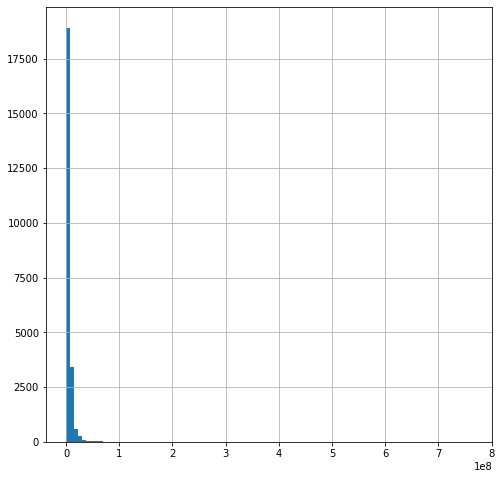

In [120]:
data['last_price'].hist(bins = 100, figsize = (8,8), grid = True) 

Мы видим аномальный всплеск, который портит всю картину. Попробую поставить диапазон и посмотреть что получится

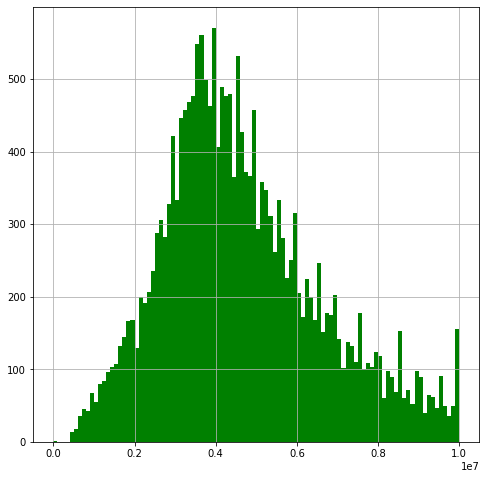

In [121]:
data['last_price'].hist(bins = 100, figsize = (8,8), grid = True, range=(0, 10000000), color = 'green') 

При таком диапазоне распределение выглядит нормальным, с одним пиком. Значит аномалий, кроме фантастической супер цены нет. Также глянем и на остальные ключевые параметры

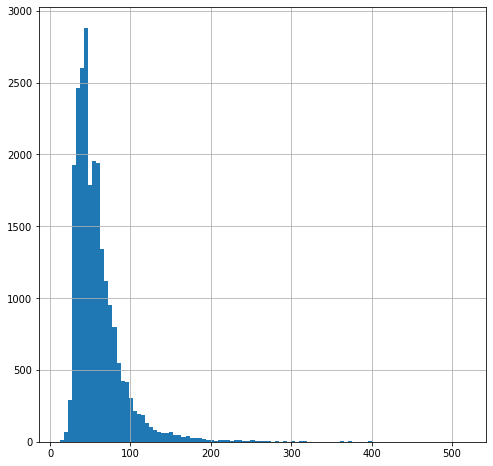

In [122]:
data['total_area'].hist(bins = 100, figsize = (8,8), grid = True) 

Опять виден  аномальный пик. Установим диапазон и посмотрим что получится

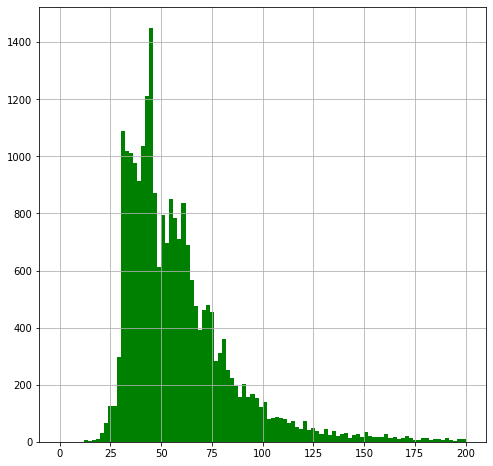

In [123]:
data['total_area'].hist(bins = 100, figsize = (8,8), grid = True, range = (0, 200), color = 'green') 

Похоже на Пуассоновское распределение, но с "хвостом". Максимальная концентрация квартир как раз площадью около 50 метров

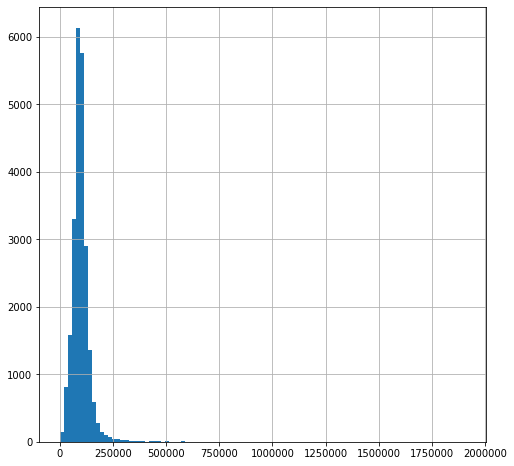

In [124]:
data['m2'].hist(bins = 100, figsize = (8,8), grid = True) 

Тип графика похож на нормальное распределние. Посмотрим в диапазоне

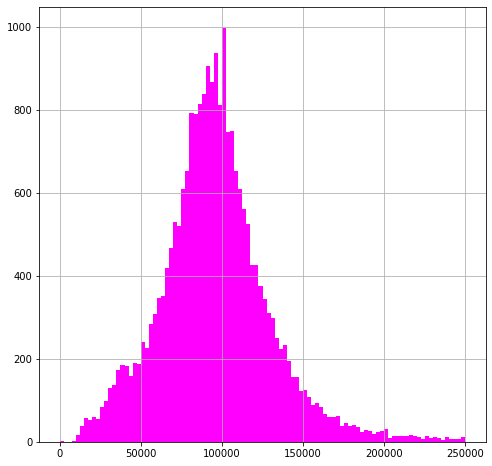

In [125]:
data['m2'].hist(bins = 100, figsize = (8,8), grid = True, range = (0, 250000), color = 'magenta') 

Красота! Распределение Пуассона выглядит отлично) Наиболее вероятное значение около 100 000 рублей ( у нас 94 810)

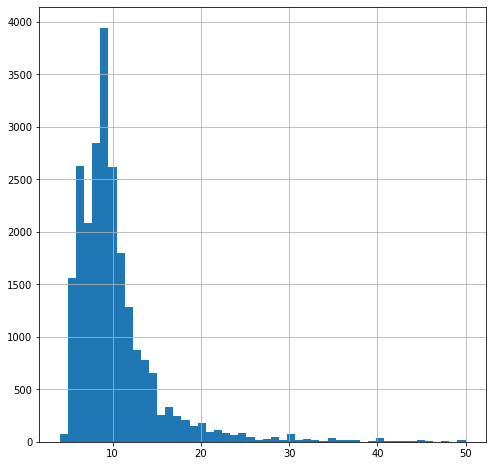

In [126]:
data['kitchen_area'].hist(bins = 50, figsize = (8,8), grid = True) 

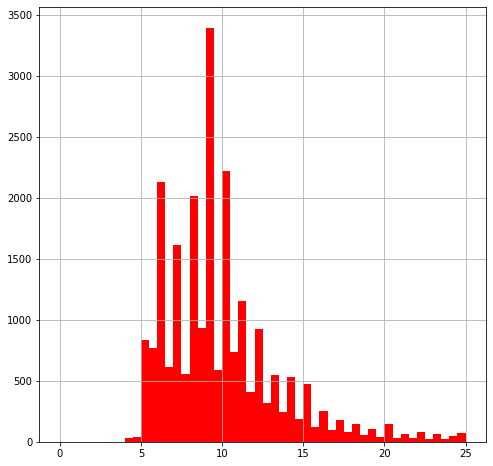

In [127]:
data['kitchen_area'].hist(bins = 50, figsize = (8,8), grid = True, range = (0,25), color = 'red') 

График снова похож на правду, наиболее вероятное значение около 10 кв метров ( у нас 9.3)

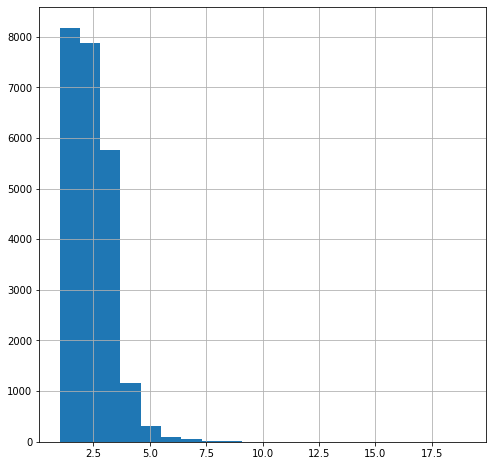

In [128]:
data['rooms'].hist(bins = 20, figsize = (8,8), grid = True) 

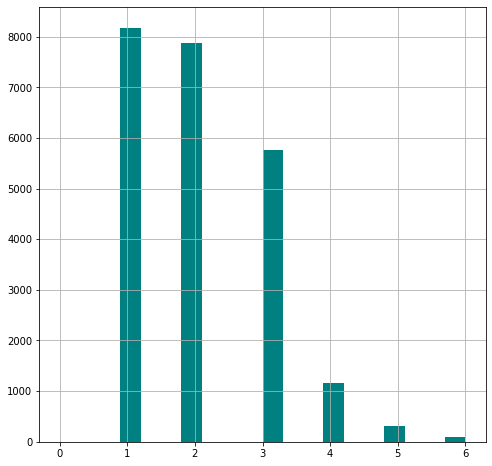

In [129]:
data['rooms'].hist(bins = 20, figsize = (8,8), grid = True, range = (0,6), color = 'teal') 

На графике хорошо видно, что основная масса квартир это 1,2 и 3 комнатные, что соответствует действительности и нашим данным

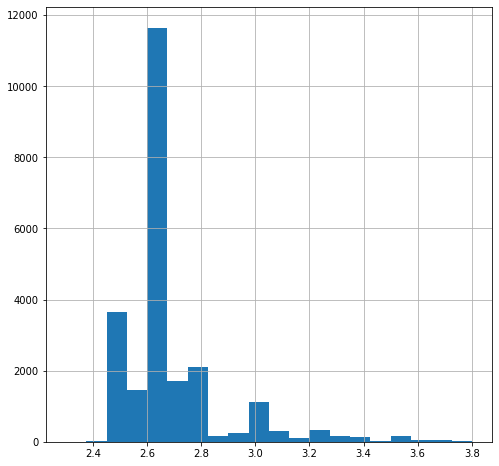

In [130]:
data['ceiling_height'].hist(bins = 20, figsize = (8,8), grid = True) 

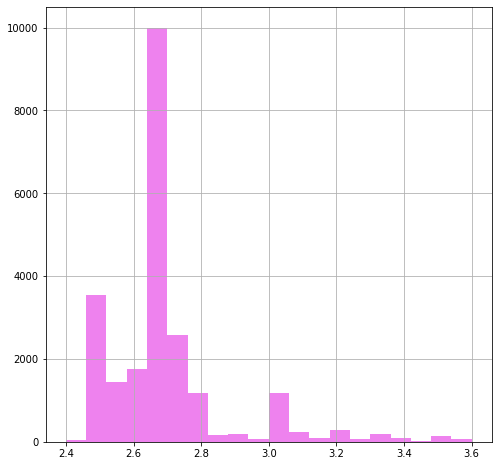

In [131]:
data['ceiling_height'].hist(bins = 20, figsize = (8,8), grid = True, range = (2.4,3.6), color = 'violet') 

По данному распределению видно, что основная высота потолков примерно 2,7 метра, что совпадает с нашими данными (2,65)

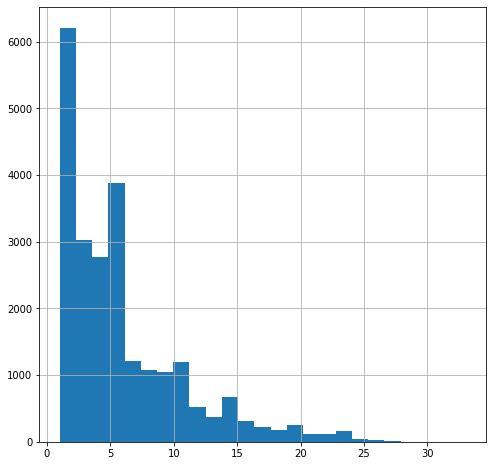

In [132]:
data['floor'].hist(bins = 25, figsize = (8,8), grid = True) 

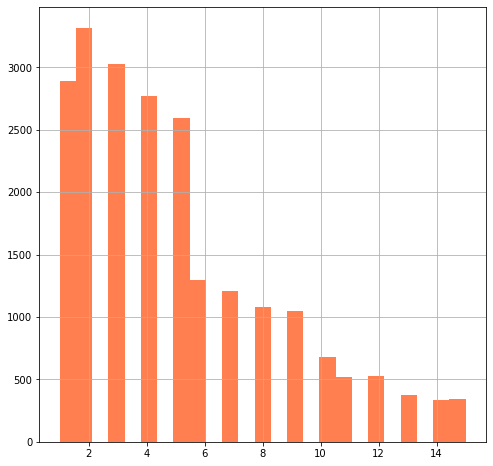

In [133]:
data['floor'].hist(bins = 25, figsize = (8,8), grid = True, range = (1, 15), color = 'coral') 

Максимальная концентрация квартир с 1 по 5 эатж, что вероятно связано с большим количеством хрущевок в стране. 

Посмотрим еще такой немаловажный момент, как количество дней, которое висит объявление

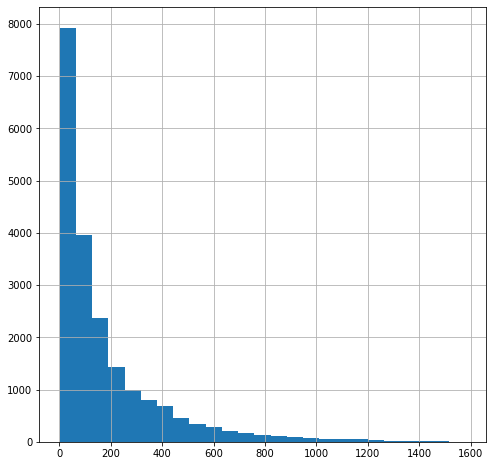

In [134]:
data['days_exposition'].hist(bins = 25, figsize = (8,8), grid = True) 

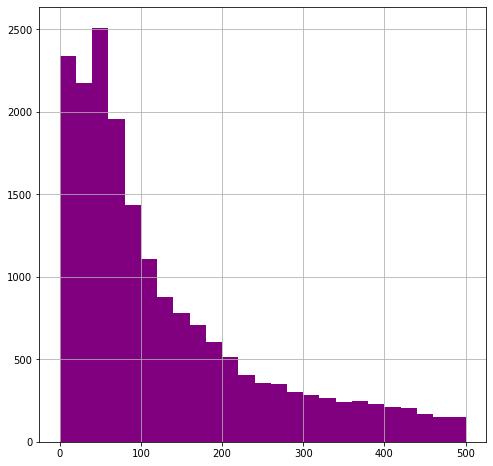

In [135]:
data['days_exposition'].hist(bins = 25, figsize = (8,8), grid = True, range = (0,500), color = 'purple') 

На этом графике видно, что большинство квартир продается в первые 70 - 100 дней с момента размещения объявления

### Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

Для выявления и удаления аномальных значений используем метод интерквартильного размаха

In [136]:
last_price_quant25 = data['last_price'].quantile(0.25)
last_price_quant75 = data['last_price'].quantile(0.75)

In [137]:
last_price_quant25


3400000.0

In [138]:
last_price_quant75

6700000.0

In [139]:
interquartile_range = last_price_quant75 - last_price_quant25

# вычислим верхнюю границу данных
upper_threshold = last_price_quant75 + 1.5*interquartile_range


# убираем квартиры с аномальной стоимостью
good_place = data[data['last_price'] < upper_threshold]


In [140]:
print("Квартир с хорошей ценой: {}".format(good_place.shape[0]))

Квартир с хорошей ценой: 21433


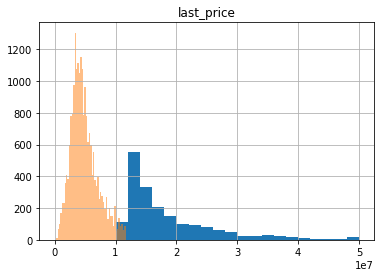

In [141]:
data[data['last_price'] >= upper_threshold].hist('last_price', bins=25, range=(0, 5e7) )

# сравним с распределением квартир
good_place['last_price'].hist(bins=50, alpha=0.5)


Посмотрим на общую площадь квартиры

In [142]:
total_area25 = data['total_area'].quantile(0.25)
total_area75 = data['total_area'].quantile(0.75)

In [143]:
total_area25


40.0

In [144]:
total_area75

69.0

In [145]:
interquartile_range_area = total_area75 - total_area25

# вычислим верхнюю границу данных
upper_threshold = total_area75 + 1.5*interquartile_range_area


# убираем квартиры с аномальной площадью
good_place = data[data['total_area'] < upper_threshold]


In [146]:
print("Квартир с хорошей total_area: {}".format(good_place.shape[0]))

Квартир с хорошей total_area: 22222


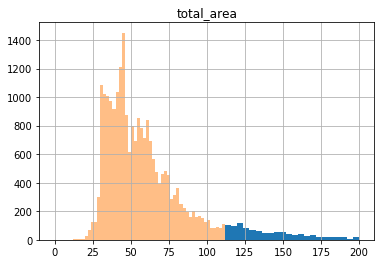

In [147]:
data[data['total_area'] >= upper_threshold].hist('total_area', bins=50, range=(0, 200), )

# сравним с распределением квартир
good_place['total_area'].hist(bins=50, alpha=0.5)


посмотрим на площадь кухни

In [148]:
kitchen_area25 = data['kitchen_area'].quantile(0.25)
kitchen_area75 = data['kitchen_area'].quantile(0.75)

In [149]:
kitchen_area25


7.3

In [150]:
kitchen_area75

11.4

In [151]:
interquartile_range_kitchen = kitchen_area75 - kitchen_area25

# вычислим верхнюю границу данных
upper_threshold = kitchen_area75 + 1.5*interquartile_range_kitchen


# убираем квартиры с аномальной площадью
good_place = data[data['kitchen_area'] < upper_threshold]


In [152]:
print("Квартир с хорошей kitchen_area: {}".format(good_place.shape[0]))

Квартир с хорошей kitchen_area: 21956


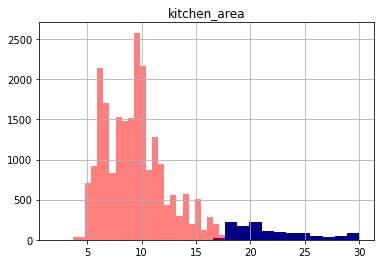

In [153]:
data[data['kitchen_area'] >= upper_threshold].hist('kitchen_area', bins=25, range=(2, 30), color = 'navy')

good_place['kitchen_area'].hist(bins=50, alpha = 0.5, range=(2, 30), color = 'red')



Посмотрим комнаты и этажи

In [154]:
data['rooms'].describe(percentiles = [.05, .25, .50, .75, .95])

count    23441.000000
mean         2.070347
std          1.049967
min          1.000000
5%           1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          4.000000
max         19.000000
Name: rooms, dtype: float64

In [155]:
data['floor'].describe(percentiles = [.05, .25, .50, .75, .95])

count    23441.000000
mean         5.901241
std          4.887839
min          1.000000
5%           1.000000
25%          2.000000
50%          4.000000
75%          8.000000
95%         16.000000
max         33.000000
Name: floor, dtype: float64

Аномальные данные по высоте потолков я обработала и удалила еще на этапе предобработки данных, а по комнатам и этажам считаю, что нет необходимости удалять аномалии, т.к. их очень мало (мы видим это из 95% квартиля и максимальные значения не очень далеки от реальности.)

### Подытог 1 <a class="anchor" id="23"></a>
Мы сформировали образ типовой квартиры, затем проанализировали и посмотрели на графиках все ключевые характеристики. Обнаружили аномальные выбросы и избавились от них. Увидели, что данные по rooms и floor имеют дискретное распределение (количество комнат и этаж не могут быть 1.25 например).Данные  цена,  общая площадь, высота потолка и площадь кухни имеют распределение Пуассона. А количество дней размещения объявления имеет явный всплеск в первые 100 дней и длинный тяжелый хвост справа, что говорит о том, что часть квартир продается очень по долгу.

## Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года. <a class="anchor" id="24"></a>

Посмотрим зависимость цены от этажа. Для этого сгруппируем медианное значение квадратного метра и категорию этажа

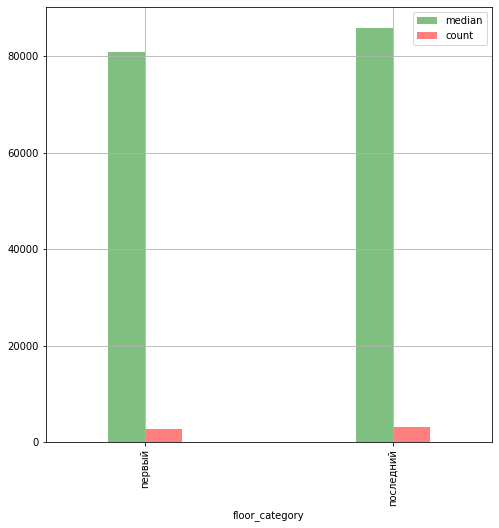

In [156]:
good_place.query('floor_category != "другой"')\
    .groupby('floor_category')['m2']\
    .agg(['median', 'count']).plot(kind='bar', figsize=(8, 8),
                          color=['green', 'red'], alpha=0.5, width=0.3, grid=True)

Разницы в цене за квадратный метр в зависимости от этажа практически нет. Квартиры на первом этаже совсем чуть-чуть дешевле последнего этажа.

Посмотрим зависимость от числа комнат. 

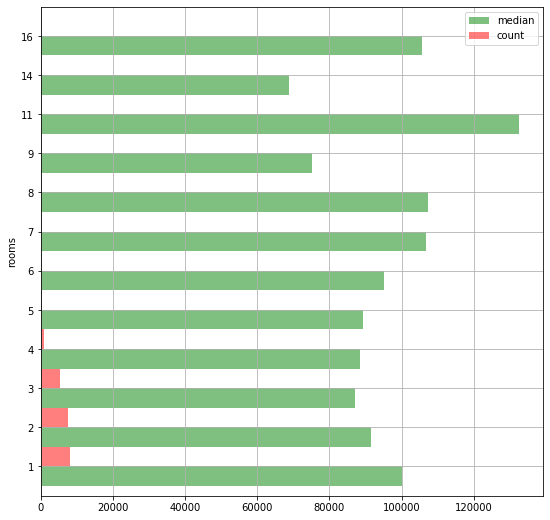

In [157]:
good_place.groupby('rooms')['m2']\
    .agg(['median', 'count']).plot(kind='barh', figsize=(9, 9),
                          color=['green', 'red'], alpha=0.5, width=1, grid=True)

 На графике видно, что чем больше комнат, тем в среднем, ниже цена. Особенно это видно на самых популярных 1,2,3 комнатных квартирах

Теперь проверим зависимость цены кв метра и даты публикации

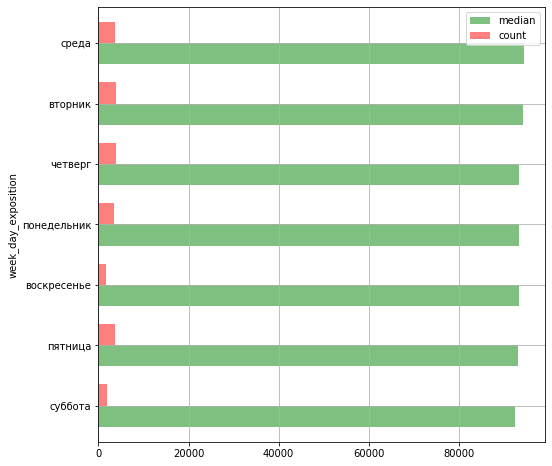

In [158]:
good_place\
    .groupby('week_day_exposition')['m2']\
    .agg(['median', 'count']).sort_values(by='median', ascending=True)\
        .plot(kind='barh', figsize=(8, 8),
                          color=['green', 'red'], alpha=0.5, width= 0.7, grid=True)

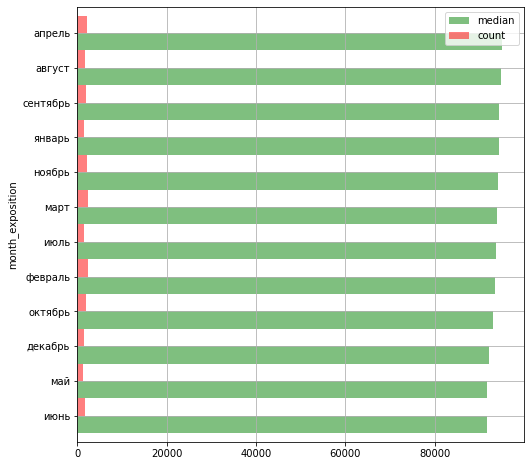

In [159]:
good_place\
    .groupby('month_exposition')['m2']\
    .agg(['median', 'count']).sort_values(by='median', ascending=True)\
        .plot(kind='barh', figsize=(8, 8),
                          color=['green', 'red'], alpha=0.5, width= 1, grid=True)

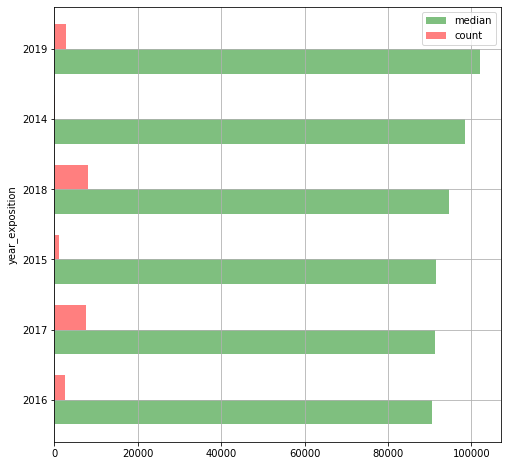

In [160]:
good_place\
    .groupby('year_exposition')['m2']\
    .agg(['median', 'count']).sort_values(by='median', ascending=True)\
        .plot(kind='barh', figsize=(8, 8),
                          color=['green', 'red'], alpha=0.5, width= 0.7, grid=True)

По диаграме видно, что день недели и месяц публикации и стоимость кв метра жилья никак не связаны, что не удивительно. А вот по годовому срезу видно, что раньше квартиры стоили дешевле, чем сейчас)

Посмотрим отношение цены кв метра и местоположения

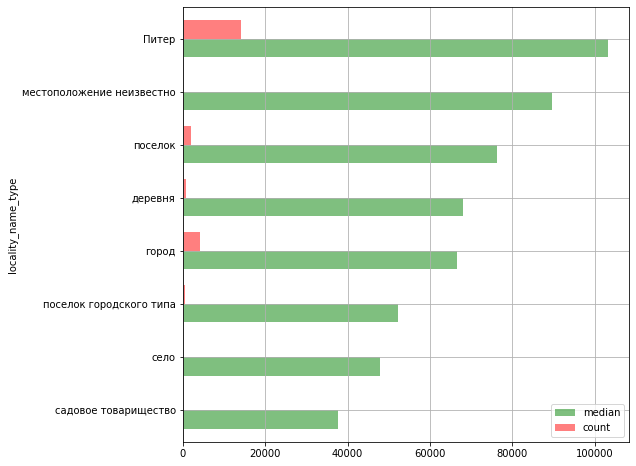

In [161]:
good_place\
    .groupby('locality_name_type')['m2']\
    .agg(['median', 'count']).sort_values(by='median', ascending=True)\
        .plot(kind='barh', figsize=(8, 8),
                          color=['green', 'red'], alpha=0.5, width= 0.7, grid=True)

Мы видим, что стоимость квартир в Питере значительно выше, чем в селах и садовых товариществах, что неудивительно)) 

Осталось посмотреть зависимость удаленности от центра города и стоимость кв метра

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe94c6cb7f0>]],
      dtype=object)

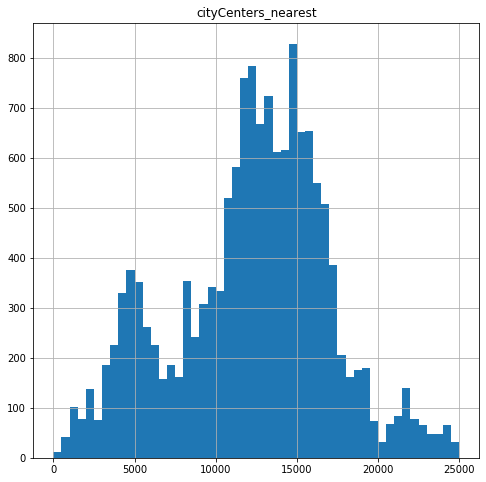

In [162]:

good_place.hist('cityCenters_nearest', figsize=(8, 8), bins=50, range = (0,25000))

In [163]:
good_place.groupby(['cityCenters_nearest'])\
    [['last_price', 'rooms', 'total_area', 'kitchen_area']].agg(['median', 'count']).head(20)

last_price        rooms       total_area        \
                         median count median count     median count   
cityCenters_nearest                                                   
181.0                31099000.0     1    5.0     1      159.0     1   
208.0                 5800000.0     1    1.0     1       33.0     1   
287.0                 9590000.0     1    2.0     1      108.0     1   
318.0                33000000.0     1    2.0     1       75.0     1   
329.0                 7200000.0     1    2.0     1       72.0     1   
387.0                13500000.0     1    3.0     1       96.0     1   
399.0                17100000.0     2    4.0     2      126.5     2   
410.0                 8000000.0     1    3.0     1      106.0     1   
467.0                 9600000.0     2    4.0     2      117.0     2   
472.0                 6900000.0     1    2.0     1       47.0     1   
515.0                 9500000.0     1    2.0     1       81.0     1   
537.0                26000000.0     1    4.0     1      122.0     1   
552.0                 9555000.0     1    3.0     1       65.0     1   
583.0                11500000.0     1    1.0     1       48.0     1   
602.0                24000000.0     1    4.0     1      132.0     1   
621.0                12000000.0     1    2.0     1       70.0     1   
623.0                 8400000.0     1    3.0     1      120.0     1   
650.0                 8500000.0     1    4.0     1       85.0     1   
653.0                15000000.0     1    5.0     1      131.0     1   
658.0                 8500000.0     1    4.0     1      125.0     1   

                    kitchen_area        
                          median count  
cityCenters_nearest                     
181.0                       15.0     1  
208.0                        6.6     1  
287.0                       11.0     1  
318.0                       12.0     1  
329.0                       12.3     1  
387.0                       14.8     1  
399.0                       11.5     2  
410.0                        9.3     1  
467.0                        9.5     2  
472.0                        8.2     1  
515.0                       16.0     1  
537.0                       14.0     1  
552.0                        6.0     1  
583.0                        9.0     1  
602.0                        9.3     1  
621.0                       10.3     1  
623.0                       12.0     1  
650.0                       10.0     1  
653.0                       12.0     1  
658.0                        8.0     1

In [164]:

good_place.query('cityCenters_nearest < 5000')['cityCenters_nearest'].count()



1563

In [165]:
good_place.query('cityCenters_nearest >= 5000 and cityCenters_nearest < 10000')['cityCenters_nearest'].count()


2588

In [166]:
good_place.query('cityCenters_nearest >= 10000 and cityCenters_nearest < 15000')['cityCenters_nearest'].count()


6422

In [167]:
good_place.query('cityCenters_nearest >= 15000 and cityCenters_nearest < 20000')['cityCenters_nearest'].count()


3544

In [168]:
good_place.query('cityCenters_nearest >= 20000')['cityCenters_nearest'].count()

2509

Мы видим, что основная масса квартир находится на отдалении от 10 до 15 км от центра, вдвое меньше находится на расстоянии от 15 до 20 км, примерно пополам квартир на расстоянии 5-10км и более 20, а совсем мало расположено вблизи центра. Вероятно это связано с меньшим количеством квартир в центре, по сравнению с окраинами (из-за общественных мест, парков и т.п) 

In [169]:
# чтобы выделить сегменты пишем функцию
def city_center_cat(d):
    if d < 5000:
        return '5 км'
    elif d < 10000 and d >= 5000:
        return '5 - 10 км'
    elif d < 15000 and d >= 10000:
        return '10 - 15 км'
    elif d < 20000 and d >= 15000:
        return '15 - 20 км'
    else:
        return 'более 20 км'



In [170]:
# создаем новый столбец в данных
good_place['cityCenters_nearest_cat'] = good_place['cityCenters_nearest'].apply(city_center_cat)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [171]:
good_place['cityCenters_nearest_cat'].value_counts()



более 20 км    7839
10 - 15 км     6422
15 - 20 км     3544
5 - 10 км      2588
5 км           1563
Name: cityCenters_nearest_cat, dtype: int64

In [172]:
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,days_exposition,m2,week_day_exposition,month_exposition,year_exposition,type_plan,living_area_relation,floor_category,kitchen_total_area_relation,locality_name_type
0,1564812,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,...,NaN,120370,четверг,март,2019,другое,0.472222,другой,0.231481,Питер
1,серия неизвестна,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,...,81.0,82920,вторник,декабрь,2018,другое,0.460396,первый,0.272277,поселок
2,сталинский,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,...,558.0,92785,четверг,август,2015,другое,0.612500,другой,0.148214,Питер
3,серия неизвестна,0,64900000,159,2015-07-24,3,2.65,14.0,30.0,9,...,424.0,408176,пятница,июль,2015,другое,0.188679,другой,0.058491,Питер
4,серия неизвестна,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,...,121.0,100000,вторник,июнь,2018,другое,0.320000,другой,0.410000,Питер


In [174]:
# Построим матрицу корреляций с корреляцией выше 0.5, так как только эта корреляция значима
corr_price_by_nearest = good_place.groupby('cityCenters_nearest_cat')\
    [['total_area', 'rooms', 'cityCenters_nearest', 'living_area', 'last_price', 
      'kitchen_area', 'living_area_relation', 'kitchen_total_area_relation', 'm2']]\
        .corr()['last_price'].reset_index()

corr_price_by_nearest[corr_price_by_nearest['last_price'].abs() > 0.5]


,cityCenters_nearest_cat,level_1,last_price
0,10 - 15 км,total_area,0.831392
1,10 - 15 км,rooms,0.503425
3,10 - 15 км,living_area,0.674068
4,10 - 15 км,last_price,1.000000
5,10 - 15 км,kitchen_area,0.557246
9,15 - 20 км,total_area,0.813502
10,15 - 20 км,rooms,0.554341
12,15 - 20 км,living_area,0.638965
13,15 - 20 км,last_price,1.000000
18,5 - 10 км,total_area,0.739470


Мы видим зависимость между стоимостью (общей, кухни и за кв метр), количеством комнат и удаленностью от центра

## Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.  <a class="anchor" id="25"></a>

In [175]:
locality_list = ['Питер','город','местоположение неизвестно']
data['prigorod'] = np.where(data['locality_name_type'].isin(locality_list), 0, 1)



In [176]:
data.groupby('prigorod').agg({'m2':'median'})

,m2
prigorod,
0,98750
1,70945


В пригороде цена ниже

In [177]:
data_top10 = data.groupby('locality_name')\
    .agg({'prigorod':'count','m2':'median'})\
    .rename(columns={'prigorod':'count_objects','m2':'m2_cost_median'})
data_top10 = data_top10.sort_values('count_objects', ascending=False).head(10)

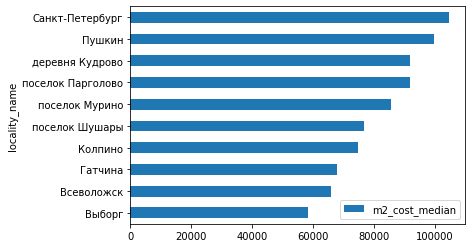

In [178]:
data_top10.sort_values('m2_cost_median', ascending=True)\
    .drop('count_objects', axis=1).plot(kind='barh')

Мы нашли ТОП 10 населенных пунктов, в которых чаще всего появляются объявления

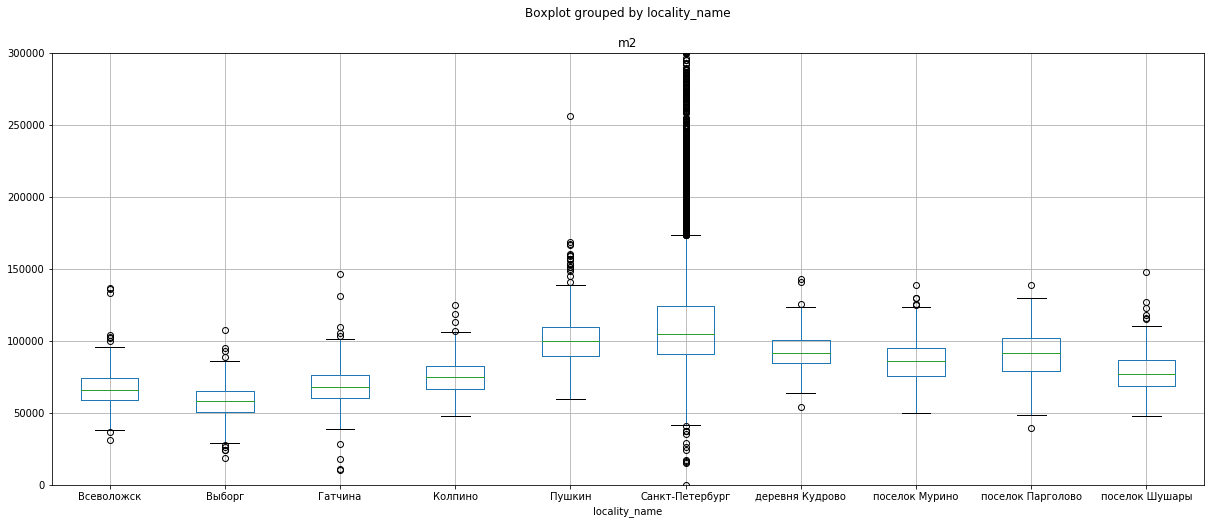

In [179]:
top_10_places = data_top10.reset_index().locality_name.to_list()

plot = data[data.locality_name.isin(top_10_places)]\
    .boxplot('m2', by='locality_name',figsize=(20,8))\
    .set_ylim(0,300000)

Видно, что стоимость кв метра выше в Санкт-Петербурге и Пушкине. Странно, что в поселке Парголово(да и во всех остальных) цена выше, чем в Выборге, хотя он достаточно крупный город

## Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке. <a class="anchor" id="26"></a>

Посмотрим корреляцию всех наших данных между собой.

In [180]:
data.corr().style.background_gradient()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,area,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,year_exposition,living_area_relation,kitchen_total_area_relation,prigorod
total_images,1,0.0986467,0.10961,0.094063,0.0432905,0.0119797,0.101832,0.0314435,-0.0278503,0.109871,-0.0242403,0.102286,0.123071,-0.00246629,-0.0450668,0.035167,-0.00702818,0.00764873,-0.00447475,-0.0304449,0.127771,0.142123,-0.0238383,-0.0503343,-0.0553065
last_price,0.0986467,1,0.612063,0.347102,0.264384,0.00196813,0.504246,0.0294359,-0.0268827,0.612088,-0.00859254,0.385002,0.0367368,-0.0259845,-0.210117,0.203466,-0.0106001,0.212071,-0.0834044,0.0733953,0.749064,-0.0395983,-0.0680168,-0.139253,-0.131073
total_area,0.10961,0.612063,1,0.768892,0.380997,-0.0699577,0.868753,-0.024213,-0.0774906,0.99996,-0.0363818,0.547425,0.0597607,-0.0304632,-0.23346,0.201251,-0.0140883,0.201727,-0.0976517,0.148701,0.278866,-0.0819793,-0.0266875,-0.405643,-0.130749
rooms,0.094063,0.347102,0.768892,1,0.238845,-0.221092,0.826062,-0.148211,-0.0807055,0.768885,-0.0449677,0.235941,0.0271041,-0.0638464,-0.182021,0.151569,-0.0514344,0.118297,-0.0561448,0.123006,0.0372789,-0.0546772,0.279506,-0.62329,-0.128472
ceiling_height,0.0432905,0.264384,0.380997,0.238845,1,-0.065856,0.350845,-0.0372078,0.00762059,0.381061,0.000106189,0.335578,-0.0147364,-0.082385,-0.299626,0.251163,-0.0575004,0.222871,-0.125903,0.105335,0.276527,-0.0521158,-0.0416134,-0.0152867,-0.103571
floors_total,0.0119797,0.00196813,-0.0699577,-0.221092,-0.065856,1,-0.162673,0.673193,0.0680532,-0.0696804,0.0495298,0.186547,0.193759,0.107374,0.0132835,-0.156245,0.095324,-0.0454847,0.0391164,-0.0497711,0.162695,0.00775781,-0.276564,0.343382,0.0701804
living_area,0.101832,0.504246,0.868753,0.826062,0.350845,-0.162673,1,-0.0961891,-0.0568229,0.868739,-0.0335641,0.379221,0.0275253,-0.0577759,-0.22324,0.203944,-0.0457992,0.175891,-0.073988,0.140307,0.189486,-0.0750325,0.355882,-0.498069,-0.133564
floor,0.0314435,0.0294359,-0.024213,-0.148211,-0.0372078,0.673193,-0.0961891,1,0.035436,-0.0239952,0.034347,0.147246,0.168164,0.0712142,0.00553029,-0.10349,0.0721511,-0.0268841,0.0250009,-0.0377383,0.138153,0.00487346,-0.202961,0.23637,0.0568891
studio,-0.0278503,-0.0268827,-0.0774906,-0.0807055,0.00762059,0.0680532,-0.0568229,0.035436,1,-0.0775615,-0.0042067,-0.014244,0.0322371,-0.0214213,-0.00629155,-0.0334088,0.00848118,-0.0108549,0.00266193,-0.0216456,0.017179,0.011646,0.0985124,0.178878,0.0291779
area,0.109871,0.612088,0.99996,0.768885,0.381061,-0.0696804,0.868739,-0.0239952,-0.0775615,1,-0.0364865,0.547554,0.0602812,-0.0304016,-0.233446,0.201289,-0.0141352,0.201897,-0.09783,0.148667,0.278991,-0.0812955,-0.0269801,-0.40552,-0.130597


Мы видим, что цена на момент снятия с публикации тесно связана со стоимостью кв метра, площадью кухни, жилой и общей площадью,  количеством комнат, высотой потолков и даже немного с наличием парка и пруда в радиусе 3 км. Есть параметры типа количества фото в объявлении, которые ни с чем не связаны и ни на что не влияют. Посмотрим корреляцию между основными характеристиками

In [181]:
corr_with_price_by_rooms = good_place.groupby('rooms')\
    [['total_area', 'cityCenters_nearest', 'living_area', 'last_price', 
      'kitchen_area', 'living_area_relation', 'kitchen_total_area_relation', 'm2']]\
        .corr()['last_price'].reset_index()

corr_with_price_by_rooms[corr_with_price_by_rooms['last_price'].abs() > 0.5]

,rooms,level_1,last_price
0,1,total_area,0.654804
3,1,last_price,1.000000
7,1,m2,0.765660
8,2,total_area,0.699172
11,2,last_price,1.000000
15,2,m2,0.888895
16,3,total_area,0.707688
19,3,last_price,1.000000
23,3,m2,0.897506
24,4,total_area,0.769122


Количество комнат больще всего коррелируется с площадью, стоимостью кв метра и ценой

In [184]:
corr_with_price_by_area = good_place.groupby('total_area')\
    [[ 'rooms', 'cityCenters_nearest', 'living_area', 'last_price', 
      'kitchen_area', 'living_area_relation', 'kitchen_total_area_relation', 'm2']]\
        .corr()['last_price'].reset_index()

corr_with_price_by_area[corr_with_price_by_area['last_price'].abs() > 0.5].head(20)

,total_area,level_1,last_price
9,13,cityCenters_nearest,-0.685187
10,13,living_area,-0.985429
11,13,last_price,1.000000
13,13,living_area_relation,-0.985767
15,13,m2,0.999939
17,15,cityCenters_nearest,-1.000000
18,15,living_area,-0.922613
19,15,last_price,1.000000
21,15,living_area_relation,-0.922613
23,15,m2,0.999087


Общая площадь больще всего коррелируется с близостью к центру, стоимостью кв метра и площадью кухни

In [185]:
corr_with_price_by_location = good_place.groupby('locality_name_type')\
    [[ 'rooms', 'cityCenters_nearest', 'living_area', 'last_price', 
      'kitchen_area', 'living_area_relation', 'kitchen_total_area_relation', 'm2']]\
        .corr()['last_price'].reset_index()

corr_with_price_by_location[corr_with_price_by_location['last_price'].abs() > 0.5]

,locality_name_type,level_1,last_price
3,Питер,last_price,1.000000
7,Питер,m2,0.696855
11,город,last_price,1.000000
15,город,m2,0.677587
19,деревня,last_price,1.000000
20,деревня,kitchen_area,0.539455
23,деревня,m2,0.625849
26,местоположение неизвестно,living_area,0.624198
27,местоположение неизвестно,last_price,1.000000
31,местоположение неизвестно,m2,0.792273


Тип местоположения больще всего коррелируется с площадью, стоимостью кв метра и ценой

## Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки. <a class="anchor" id="27"></a>

In [186]:
good_houses_by_type = good_place.pivot_table(index='type_plan',
        values=['last_price', 'total_area', 'm2', 'days_exposition', 'kitchen_area', 'ceiling_height', 'rooms', 'floor'], 
                                             aggfunc='median')

good_houses_by_type

,ceiling_height,days_exposition,floor,kitchen_area,last_price,m2,rooms,total_area
type_plan,,,,,,,,
апартаменты,3.00,58.0,3.0,10.0,6065000,110131.5,2,56
другое,2.65,93.0,4.0,9.2,4500000,93473.0,2,50
свободная планировка,2.65,45.0,7.5,9.3,2715000,101111.0,1,27
студия,2.65,54.0,7.0,9.3,2775000,105306.5,1,26


Я сравнила основные медианные параметры (высота потолков, этаж, стоимость за кв метр и полная, количество комнат и т.д.) в квартирах 4-х типов планировки.
Стало очевидно, что квартиры свободной планировки и студии продаются почти за одинаковую сумму (и она дешевле других категорий) и быстрее (45 и 54 дней соответственно) Этажность выше, количество комнат по 1, в то время как у других типов планировки их по 2. Интересно, что площадь кухни не зависит от типа планировки, а вот общая площадь у квартир свободной планировки и студий почти вдвое меньше, чем у других квартир. Потолки выше только в апартаментах, а в остальных квартирах они идентичны. Стоимость кв метра принципиально не отличается и лишь чуть чуть ниже у типовых квартир и чуть выше в апартаментах.

# ИТОГ ПРОЕКТА <a class="anchor" id="28"></a>

### Проект был непростым, но интересным))) . Сейчас, дойдя до конца, я стала лучше понимать как в следующем проекте оптимизировать время работы,  мне стало понятно, что часть работ можно было и не делать. Так, например, серии домов можно было не лемматизировать и не обрабатывать так тщательно, т.к. на дальнейший анализ они никак не влияли. Некоторые другие данные в работе также не использовались ( парки, близость парков, близость к аэропорту и т.д.)

### Во время работы над проектом были просмотрены и обработаны все данные, заполнены пропуски, устранены аномалии. Я использовала в работе и удаление столбцов, и замену на медианное значение, строила гистограмы, боксплоты и корреляционные таблицы. Я категоризировала некоторые характеристики (тип населенного пункта, расстояние до центра, этаж). Были посчитаны и добавлены в таблицу: цена квадратного метра; день недели, месяц и год публикации объявления; этаж, на котором расположена квартира (первый, последний, другой), соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Были расчитаны параметры типовой квартиры и проведен анализ того, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года. Мой анализ показал, что чем дальше от центра находится квартира, тем меньше цена квадратного метра, что в Санкт-Петербурге квартиры дороже, чем в области и что в период  с 2016 по 2019 года цена квадратного метра выросла.

###  Определила топ-10 населенных пунктов по количеству объявлений (Питер, Выборг, деревня Кудрово, поселок Паргоново, поселок Мурино, Пеергоф, Гатчина, Колпино и др) и обнаружили, что в Питере самые дорогие квартиры (за кв метр), а самые дешевые в Выборге. Проанализировала квартиры свободной планировки, апартаменты  и студии и выяснила их типовые характеристики. Стало ясно, что студии и квартиры свободной планировки очень схожи по параметрам, а вот апартаменты стоят дороже, имеют большую площадь и стоимость.

### Основные факторы, влияющие на цену - общая площадь, удаленность от центра и местоположение, кол-во комнат. Остальные характеристики оказывают не такое сильное воздействие.



* [Назад к началу проекта ](#29)